<a href="https://colab.research.google.com/github/LuisRobles18/CSC8850-Advanced-Machine-Learning/blob/main/CSC8850_ADML_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CSC8850 Advanced Machine Learning Homework 1 (Problem 7)**
**Student Name:** Luis Alberto Robles Hernandez **Student ID:** 002581393

Importing the required modules

In [194]:
#Modules required for the Exercise
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

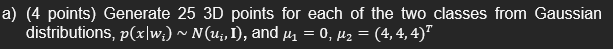

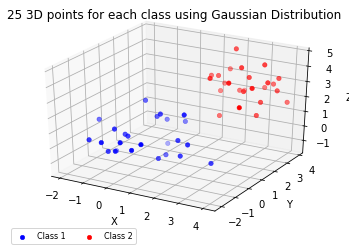

In [195]:
#3D points for class 1
x1 =np.random.normal(0,1,25)
y1 =np.random.normal(0,1,25)
z1 =np.random.normal(0,1,25)
#3D points for class 2
x2 =np.random.normal(3,1,25)
y2 =np.random.normal(3,1,25)
z2 =np.random.normal(3,1,25)

#Each of the 3D points will be grouped in their corresponding class
class_1 = []
class_2 = []
#At the same time, the features and the labels will be on separated variables
x_train = []
y_train = []

for i in range(25):
  class_1.append([x1[i],y1[i],z1[i],1])
  class_2.append([x2[i],y2[i],z2[i],-1])
  x_train.append([x1[i],y1[i],z1[i]])
  y_train.append(1)
  x_train.append([x2[i],y2[i],z2[i]])
  y_train.append(-1)

x_train = np.array(x_train)

#We join both 3D points from the two classes in a single dataset
dataset = class_1 + class_2

#We show the projection of the 3D points for each class
ax = plt.axes(projection='3d')
ax.set_title("25 3D points for each class using Gaussian Distribution")
ax.scatter(x1, y1, z1, c="blue", linewidth=0.5, label = 'Class 1');
ax.scatter(x2, y2, z2, c="red", linewidth=0.5, label = 'Class 2');
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
plt.show()

image.png

In [196]:
#We set an initial value for B
B = 0
for i in range(50):
        xi = np.linalg.norm(dataset[i][:-1])
        temp_value = math.pow(xi,2)
        if temp_value > B:
                B= temp_value

print("Value of B²: "+str(B))

Value of B²: 39.011040994506885


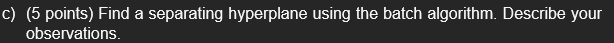
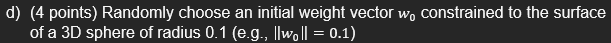

**NOTE: The initial weight vector is already set to [0,0,0.1]. Both answers for C and D are in the following block of code**

In [199]:
#Batch Perceptron algorithm
def batch(dataset, eta, w):
        temp = np.array([0 for i in range(len(w))])
        #We calculate the w after a certain amount of iterations
        #If loop doesn't stop, it means the the hyperplane cannot be obtained
        b = 0
        label = 0
        prod = 0
        while True:
                #We store the initial w in the w variable
                w = np.array(w)
                for i in dataset:
                        temp_sample_i = np.array(i[:-1])
                        #Will perform the product between w and the sample on the index i
                        prod = w.dot(temp_sample_i)
                        #Based on the result this will labeled to the corresponding class
                        label = 1 if prod >= 0 else -1
                        b+= eta * label
                        #If the label is not correct
                        if i[-1] != label:
                                temp = temp+np.array([tmp*label for tmp in i[:-1]])
                w = w + np.array([tmp*eta for tmp in temp])
                #The loop will continue until the condition for the batch perceptron algorithm is met
                if np.linalg.norm([tmp*eta for tmp in temp]) < 0.1:
                        return w,b

#The resulting w will depend on the dataset provided, learning rate, and initial w
w,b = batch(dataset,-0.005,[0,0,0.1])
print("Resulting W:")
print(w)
print("\n Bias: ")
print(b)

Resulting W:
[ 0.01075331 -1.22493659  1.19692238]

 Bias: 
12.870000000000612


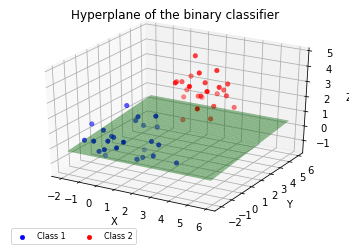

In [200]:
#We create the hyperplane data dimension
XX = np.arange(-2, 6, 0.1)
YY = np.arange(-2, 6, 0.1)
XX, YY = np.meshgrid(XX, YY)
#Then we specify the projection of the plane
#NOTE: The 4th dimension of w is set to 1
Z = -(1/b)*(w[0]*XX + w[1]*YY + w[2])

ax = plt.axes(projection='3d')
ax.set_title("Hyperplane of the binary classifier")
ax.scatter(x1, y1, z1, c="blue", linewidth=0.5, label = 'Class 1');
ax.scatter(x2, y2, z2, c="red", linewidth=0.5, label = 'Class 2');
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.plot_surface(XX, YY, Z, alpha=0.45, color = 'green')
plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
plt.show()

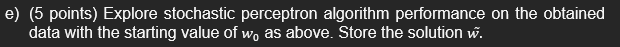

In [201]:
#Weights for w
#w=np.ones((x_train.shape[1],1))
w=np.array([[0.0],[0.0],[0.1]])
#Bias
b=1;
#Learning rate or ETA
learning_rate=0.005;
#k0 initial value
k = 0
#This variable will determine if every point was correctly classified
everything_correct = False;
# Stochastic Gradient Descent Algorithm
while not everything_correct:
    #We initially assume all points are correctly classified
    misclassified_count = 0
    for i in range(x_train.shape[0]):
        XX=x_train[i,]
        yy=y_train[i]
        #This is the condition that will tell us if any of the 3D points is not correctly classified
        if yy * (np.dot(w.T,XX.T)+b)<0:
            #If that's the case, we update w, and the bias
            w+=learning_rate * np.dot(XX,yy).reshape(3,1)
            b+=learning_rate * yy
            misclassified_count +=1
    #Once there are no misclassified points, we end the algorithm
    if misclassified_count==0:
        everything_correct=True
print("Resulting W:")
print(w)
print("\n Bias")
print(b)

Resulting W:
[[-0.19065409]
 [-0.20230591]
 [-0.09968474]]

 Bias
0.9249999999999999


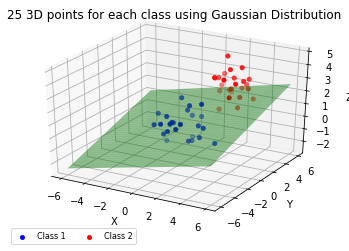

In [203]:
#We create the hyperplane data dimension
XX = np.arange(-6, 6, 0.1)
YY = np.arange(-6, 6, 0.1)
XX, YY = np.meshgrid(XX, YY)
#Then we specify the projection of the plane
Z = -(1/b)*(w[0][0]*XX + w[1][0]*YY + w[2][0])

ax = plt.axes(projection='3d')
ax.set_title("25 3D points for each class using Gaussian Distribution")
ax.scatter(x1, y1, z1, c="blue", linewidth=0.5, label = 'Class 1');
ax.scatter(x2, y2, z2, c="red", linewidth=0.5, label = 'Class 2');
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.plot_surface(XX, YY, Z, alpha=0.45, color = 'green')
plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
plt.show()

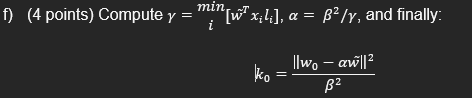

In [221]:
#w solution stored from previous problem
w_tilde = w
min_i = 100000000
w_tilde_transpose = w_tilde.transpose()
for i in range(50):
  label = dataset[i][-1]
  xi = np.linalg.norm(dataset[i][:-1])
  prod = xi*label
  if prod < min_i:
    min_i = prod

fancy_y = w_tilde_transpose * min_i

#Fancy y
print('γ: '+str(fancy_y))

alpha_r = B/fancy_y
#Alpha
print('α: '+str(alpha_r))

γ: [[1.19080294 1.26357882 0.62261911]]
α: [[32.76028273 30.87345268 62.65635008]]


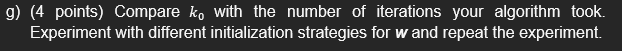

In a hypothetical case in which the previous question is answered, the number of iterations would always be greater than or equal to k0.